## Mushroom Classification Edible / Poisnous :

## 1) Problem statement.

**Data:** Mushroom Data

**Problem statement :**
- This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

- Time period: Donated to UCI ML 27 April 1987

## 2) Challenges and other objectives :

- Need to handle many null values in almost all columns
- Misclassification leading to fatality.
- Help in shrooming (Mushroom Hunting)

In [9]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statistics import mean
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler , LabelEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

import pickle

import warnings
warnings.filterwarnings("ignore")

In [10]:
#Loading dataset
data = pd.read_csv('mushrooms.csv')

In [4]:
#Top 5 sample rows of data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
#Last 5 sample rows of data
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [19]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [28]:
#Description about the dataset
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [29]:
#Dimension of the data
rows , features = data.shape
print(f"Dataset has {rows} tuples.")
print(f"Dataset has {features} features / columns.")

Dataset has 8124 tuples.
Dataset has 23 features / columns.


As you can see that there are 8124 rows and 23 columns in this data.

In [30]:
#Datatypes of features/columns in our dataset
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#### All features / columns have object datatype and are categorical.

In [32]:
data['class'].unique()

array(['p', 'e'], dtype=object)

#### Dataset has two major classes Poisnous - p and Edible - e

Here we can see that there are two classes present in our target column which are 'p' - poisonous and 'e' - edible.

In [34]:
e , p = data['class'].value_counts()

In [37]:
ratio = e/p
ratio

1.0745658835546477

#### The dataset is balanced , having equal number of samples both classes.
- Hence it does not deal with issue of imbalance data.
- If the dataset had imbalance it could be fixed by using oversampling or undersampling technique.
  Most used tehnique is SMOTE.
- It is always good to conduct SMOTE incase of live data because it can balanced or imbalanced.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

#### Handling missing values

In [39]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [41]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- The dataset has no null values.
- The dataset has no na values.
- The data description mentions missing values in the column is replaced with "?".

In [43]:
for i in data.columns:
    missing = data[i][data[i]=='?'].count()
    if missing != 0:
        print("The following column has missing values:")
        print(i, missing)

The following column has missing values:
stalk-root 2480


##### There are 2480 missing values in 'stalk-root' column.
##### There are many ways to hnadle missing values in a dataset
- 1. Delete rows:
##### We cannot delete because the number of rows are large.
- 2. Impute missing values with Mean/Median:
##### Works for continuos numerical data so we cannot use this method.
- 3. Imputation for categorical feature:
##### Using simple imputer
- 4. Using algorithms
- 5. Using deep learning techniques


#### First we will replace missing values with np.nan

In [13]:
data['stalk-root'] = data['stalk-root'].replace(to_replace='?',value=np.nan)

In [44]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Imputing missing values using Simple Imputer
##### Simple Imputer has four types of stratergy
- 1. Mean
- 2. Median
- 3. Most Frequent
- 4. Constant

##### Most Frequent stratergy is suitable for our dataset.

In [47]:
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [48]:
data['stalk-root'] = impute.fit_transform(data[['stalk-root']])

In [49]:
# Lets check how many unique values are present in each columns
for i in data.columns:
    print(i,data[i].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


##### Removing columns that dont add any information
- Having no information.
- Having same values thorughout.
- Hence we will remove veil-type column.

In [50]:
data = data.drop(['veil-type'],axis=1)

In [52]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

##### The missing values and unwanted data is removed from the dataset.
- The dataset is now suitable for EDA.
- The dataset can be further used for ML.

### Exploratory Data Analysis (EDA)

##### Dataset Distribution of Classes:

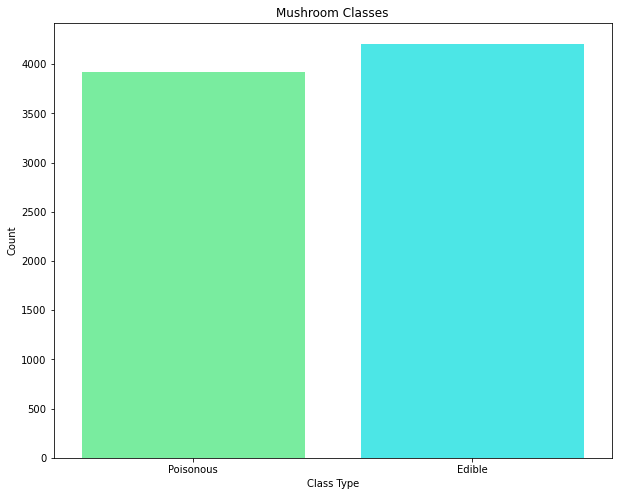

In [86]:
plt.figure(figsize=(10,8))
fig = sns.countplot(x = 'class',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Class Type')
plt.ylabel('Count')
fig.set_xticklabels(['Poisonous','Edible'])
plt.title('Mushroom Classes')
plt.show()

In [88]:
cap_surface = data['cap-surface'].value_counts()
cap_surface

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [94]:
data.groupby(['cap-surface'])['class'].value_counts()

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64

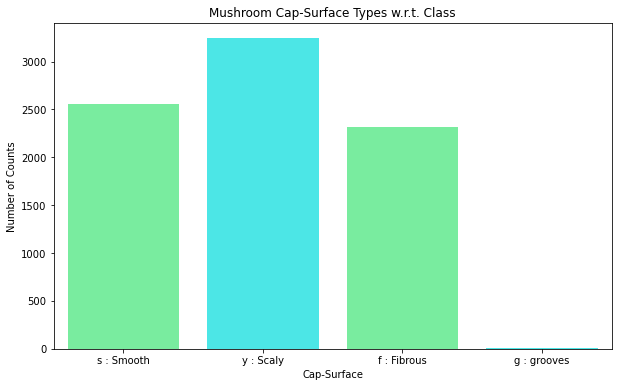

In [95]:
plt.figure(figsize=(10,6))
cap_surface = sns.countplot(x='cap-surface',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Cap-Surface')
plt.ylabel('Number of Counts')
cap_surface.set_xticklabels(['s : Smooth', 'y : Scaly', 'f : Fibrous', 'g : grooves'])
plt.title('Mushroom Cap-Surface Types w.r.t. Class')
plt.show()

From above analysis, we can say that there are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.

In [96]:
Bruises = data['bruises'].value_counts()
Bruises

f    4748
t    3376
Name: bruises, dtype: int64

In [97]:
data.groupby(['bruises'])['class'].value_counts()

bruises  class
f        p        3292
         e        1456
t        e        2752
         p         624
Name: class, dtype: int64

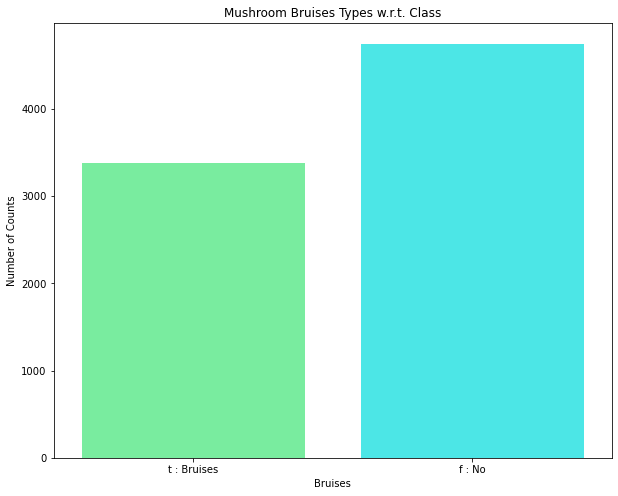

In [101]:
plt.figure(figsize=(10,8))
bruises = sns.countplot(x='bruises',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Bruises')
plt.ylabel('Number of Counts')
bruises.set_xticklabels(['t : Bruises', 'f : No'])
plt.title('Mushroom Bruises Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom may or may not have bruises but still it could be poisonous or edible according to our data.

In [103]:
GillSpacing = data['gill-spacing'].value_counts()
GillSpacing

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [104]:
# Let's see each type with the counts of target class column
data.groupby(['gill-spacing'])['class'].value_counts()

gill-spacing  class
c             p        3804
              e        3008
w             e        1200
              p         112
Name: class, dtype: int64

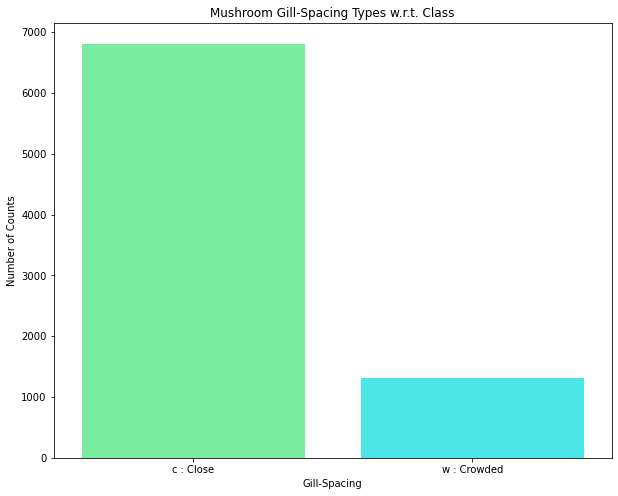

In [107]:
plt.figure(figsize=(10,8))
gill_spacing = sns.countplot(x='gill-spacing',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Gill-Spacing')
plt.ylabel('Number of Counts')
gill_spacing.set_xticklabels(['c : Close', 'w : Crowded'])
plt.title('Mushroom Gill-Spacing Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.

In [108]:
GillSize = data['gill-size'].value_counts()
GillSize

b    5612
n    2512
Name: gill-size, dtype: int64

In [109]:
data.groupby(['gill-size'])['class'].value_counts()

gill-size  class
b          e        3920
           p        1692
n          p        2224
           e         288
Name: class, dtype: int64

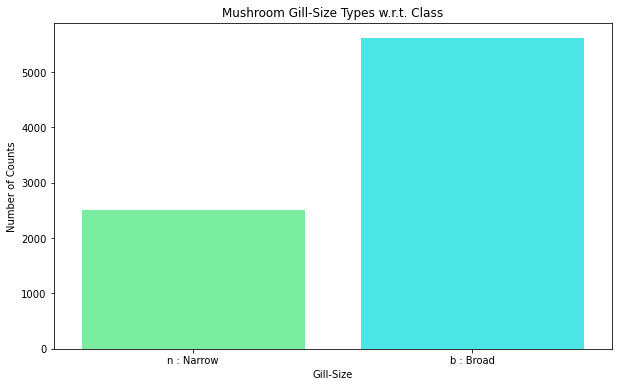

In [110]:
plt.figure(figsize=(10,6))
gill_size = sns.countplot(x='gill-size',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Gill-Size')
plt.ylabel('Number of Counts')
gill_size.set_xticklabels(['n : Narrow', 'b : Broad'])
plt.title('Mushroom Gill-Size Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.

In [111]:
# Let's check count of classes present in 'gill-color' column
GillColor = data['gill-color'].value_counts()
GillColor

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [112]:
# Let's see each type with the counts of target class column
data.groupby(['gill-color'])['class'].value_counts()

gill-color  class
b           p        1728
e           e          96
g           p         504
            e         248
h           p         528
            e         204
k           e         344
            p          64
n           e         936
            p         112
o           e          64
p           e         852
            p         640
r           p          24
u           e         444
            p          48
w           e         956
            p         246
y           e          64
            p          22
Name: class, dtype: int64

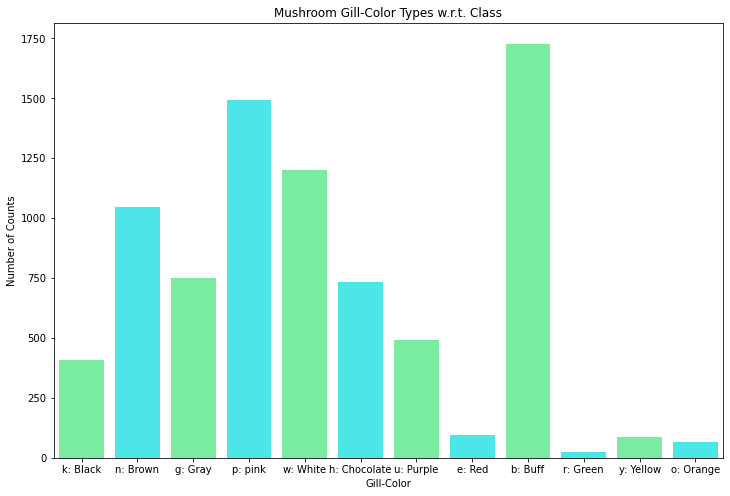

In [116]:
# Let's visualize the feature column 'gill-color' w.r.t. target column 'class'

plt.figure(figsize=(12,8))
gill_color = sns.countplot(x='gill-color',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Gill-Color')
plt.ylabel('Number of Counts')
gill_color.set_xticklabels(['k: Black', 'n: Brown', 'g: Gray', 'p: pink', 'w: White', 
                           'h: Chocolate', 'u: Purple', 'e: Red', 'b: Buff', 'r: Green', 
                           'y: Yellow', 'o: Orange'])
plt.title('Mushroom Gill-Color Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.

In [117]:
# Let's check count of classes present in 'stalk-root' column
StalkRoot = data['stalk-root'].value_counts()
StalkRoot

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [118]:
# Let's see each type with the counts of target class column
data.groupby(['stalk-root'])['class'].value_counts()

stalk-root  class
?           p        1760
            e         720
b           e        1920
            p        1856
c           e         512
            p          44
e           e         864
            p         256
r           e         192
Name: class, dtype: int64

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

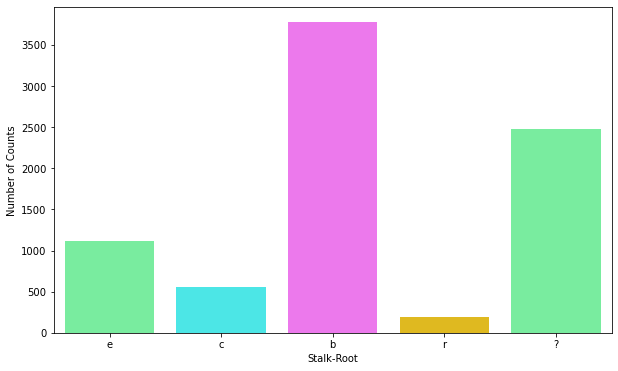

In [122]:
plt.figure(figsize=(10,6))
stalk_root = sns.countplot(x='stalk-root',data=data,palette=['#66ff99',"#33ffff","#ff66ff","#ffcc00"])
plt.xlabel('Stalk-Root')
plt.ylabel('Number of Counts')
stalk_root.set_xticklabels(['e: Equal', 'c: Club', 'b: Bulbous', 'r: Rooted'])
plt.title('Mushroom Stalk-Root Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.

In [124]:
# Let's check count of classes present in 'stalk-surface-above-ring' column
StalkSurfaceAboveRing = data['stalk-surface-above-ring'].value_counts()
StalkSurfaceAboveRing

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [125]:
# Let's see each type with the counts of target class column
data.groupby(['stalk-surface-above-ring'])['class'].value_counts()

stalk-surface-above-ring  class
f                         e         408
                          p         144
k                         p        2228
                          e         144
s                         e        3640
                          p        1536
y                         e          16
                          p           8
Name: class, dtype: int64

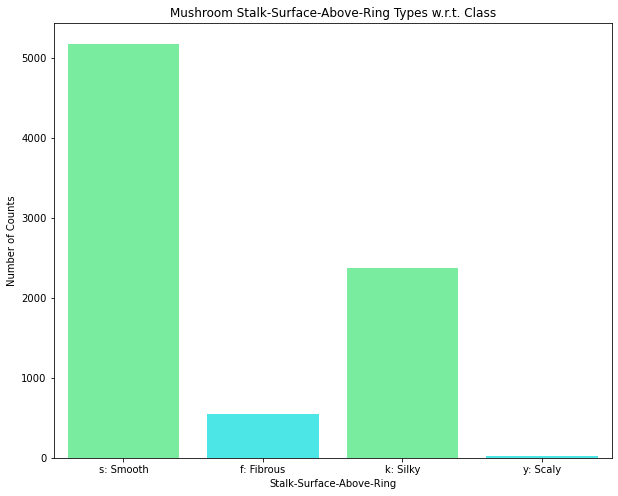

In [127]:
# Let's visualize the feature column 'stalk-surface-above-ring' w.r.t. target column 'class'

plt.figure(figsize=(10,8))
stalk_surface_above_ring = sns.countplot(x='stalk-surface-above-ring',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Stalk-Surface-Above-Ring')
plt.ylabel('Number of Counts')
stalk_surface_above_ring.set_xticklabels(['s: Smooth', 'f: Fibrous', 'k: Silky', 'y: Scaly'])
plt.title('Mushroom Stalk-Surface-Above-Ring Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.

In [129]:
# Let's check count of classes present in 'stalk-surface-below-ring' column
StalkSurfaceBelowRing = data['stalk-surface-below-ring'].value_counts()
StalkSurfaceBelowRing

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64

In [130]:
# Let's see each type with the counts of target class column
data.groupby(['stalk-surface-below-ring'])['class'].value_counts()

stalk-surface-below-ring  class
f                         e         456
                          p         144
k                         p        2160
                          e         144
s                         e        3400
                          p        1536
y                         e         208
                          p          76
Name: class, dtype: int64

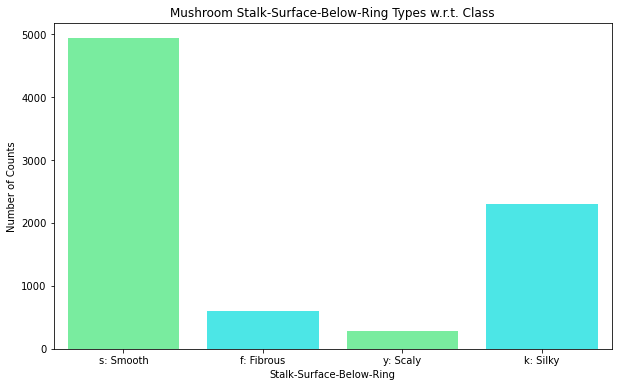

In [131]:
plt.figure(figsize=(10,6))
stalk_surface_below_ring = sns.countplot(x='stalk-surface-below-ring',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Stalk-Surface-Below-Ring')
plt.ylabel('Number of Counts')
stalk_surface_below_ring.set_xticklabels(['s: Smooth', 'f: Fibrous', 'y: Scaly', 'k: Silky'])
plt.title('Mushroom Stalk-Surface-Below-Ring Types w.r.t. Class')
plt.show()

From above analysis, we can say that mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.

In [132]:
# Let's check count of classes present in 'ring-type' column
RingType = data['ring-type'].value_counts()
RingType

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [133]:
# Let's see each type with the counts of target class column
data.groupby(['ring-type'])['class'].value_counts()

ring-type  class
e          p        1768
           e        1008
f          e          48
l          p        1296
n          p          36
p          e        3152
           p         816
Name: class, dtype: int64

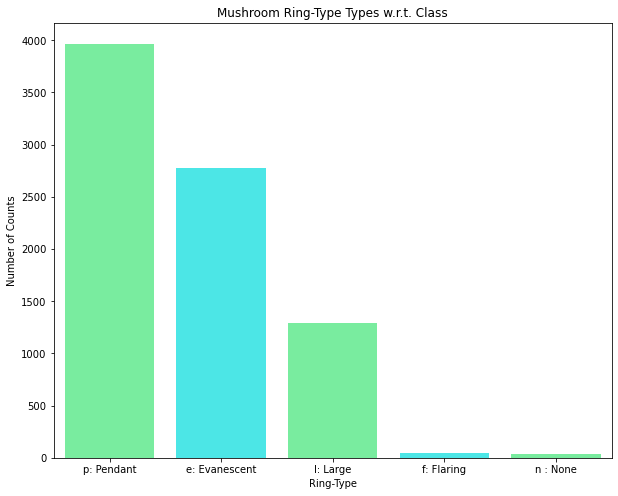

In [134]:
# Let's visualize the feature column 'ring-type' w.r.t. target column 'class'
plt.figure(figsize=(10,8))
ring_type = sns.countplot(x='ring-type',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Ring-Type')
plt.ylabel('Number of Counts')
ring_type.set_xticklabels(['p: Pendant', 'e: Evanescent', 'l: Large', 'f: Flaring', 'n : None'])
plt.title('Mushroom Ring-Type Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.

In [135]:
# Let's check count of classes present in 'spore-print-color' column
SporePrintColor = data['spore-print-color'].value_counts()
SporePrintColor

w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: spore-print-color, dtype: int64

In [136]:
# Let's see each type with the counts of target class column
data.groupby(['spore-print-color'])['class'].value_counts()

spore-print-color  class
b                  e          48
h                  p        1584
                   e          48
k                  e        1648
                   p         224
n                  e        1744
                   p         224
o                  e          48
r                  p          72
u                  e          48
w                  p        1812
                   e         576
y                  e          48
Name: class, dtype: int64

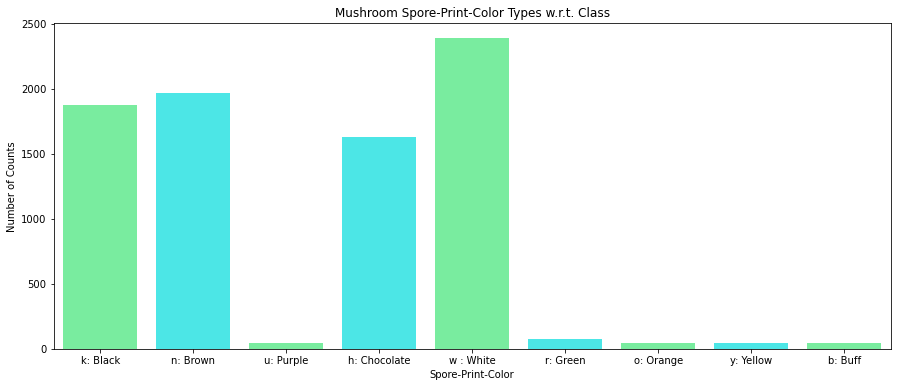

In [137]:
# Let's visualize the feature column 'spore-print-color' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
spore_print_color = sns.countplot(x='spore-print-color',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Spore-Print-Color')
plt.ylabel('Number of Counts')
spore_print_color.set_xticklabels(['k: Black', 'n: Brown', 'u: Purple', 'h: Chocolate', 'w : White', 
                                  'r: Green', 'o: Orange', 'y: Yellow', 'b: Buff'])
plt.title('Mushroom Spore-Print-Color Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.

In [138]:
# Let's check count of classes present in 'population' column
Population = data['population'].value_counts()
Population

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [139]:
# Let's see each type with the counts of target class column
data.groupby(['population'])['class'].value_counts()

population  class
a           e         384
c           e         288
            p          52
n           e         400
s           e         880
            p         368
v           p        2848
            e        1192
y           e        1064
            p         648
Name: class, dtype: int64

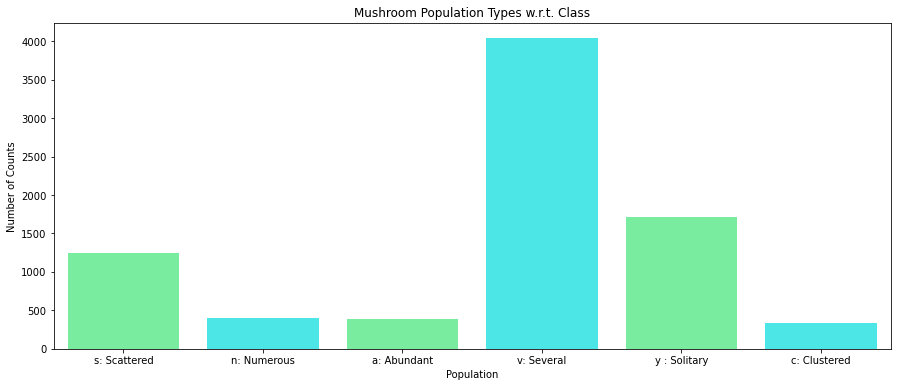

In [140]:
# Let's visualize the feature column 'population' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
population = sns.countplot(x='population',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Population')
plt.ylabel('Number of Counts')
population.set_xticklabels(['s: Scattered', 'n: Numerous', 'a: Abundant', 'v: Several', 'y : Solitary', 'c: Clustered'])
plt.title('Mushroom Population Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.

In [141]:
# Let's check count of classes present in 'habitat' column
Habitat = data['habitat'].value_counts()
Habitat

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [142]:
# Let's see each type with the counts of target class column
data.groupby(['habitat'])['class'].value_counts()

habitat  class
d        e        1880
         p        1268
g        e        1408
         p         740
l        p         592
         e         240
m        e         256
         p          36
p        p        1008
         e         136
u        p         272
         e          96
w        e         192
Name: class, dtype: int64

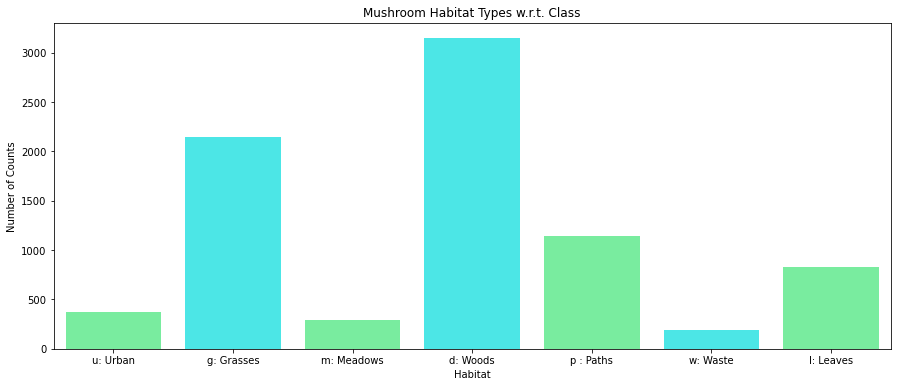

In [143]:
# Let's visualize the feature column 'habitat' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
habitat = sns.countplot(x='habitat',data=data,palette=['#66ff99',"#33ffff"])
plt.xlabel('Habitat')
plt.ylabel('Number of Counts')
habitat.set_xticklabels(['u: Urban', 'g: Grasses', 'm: Meadows', 'd: Woods', 'p : Paths', 'w: Waste', 'l: Leaves'])
plt.title('Mushroom Habitat Types w.r.t. Class')
plt.show()

From above analysis, we can say that 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.

#### Functions for model training and evaluation

In [144]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [145]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [146]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

#### Data Preproccessing

In [147]:
# First we will map our target column to 0 and 1 values 
data['class'] = data['class'].map({'p':0,'e':1})

In [148]:
data['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

In [149]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [156]:
#Independent Features
X = data.drop(['class'],axis=1) 
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


In [157]:
#Target / Output / Predict / Dependent Feature
y = data['class']
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

Now we will split our data into independent features - X  and dependent target - y.

#### Using LabelEncoder for encoding

In [166]:
le = LabelEncoder()

In [173]:
X_columns = X.columns

In [174]:
for i in X_columns:
    X[i] = le.fit_transform(X[i])

In [175]:
# Let's take a look at our data
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [176]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

Now we will split our data into train and test set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Now we will use feature selection to find out best features to use for our model. For this purpose we will use SelectKBest method with score_func as chi2

In [65]:
fs = SelectKBest(score_func=chi2, k ='all')

In [66]:
# fitting train and test data
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000021B8264FEE0>)

Feature 0: 9.263320
Feature 1: 160.254363
Feature 2: 5.897075
Feature 3: 919.925332
Feature 4: 65.961427
Feature 5: 2.420369
Feature 6: 601.552552
Feature 7: 1261.698364
Feature 8: 4481.101411
Feature 9: 28.658561
Feature 10: 1032.181093
Feature 11: 164.582402
Feature 12: 155.900921
Feature 13: 88.828475
Feature 14: 84.771468
Feature 15: 3.888454
Feature 16: 19.772966
Feature 17: 1445.464235
Feature 18: 293.310364
Feature 19: 237.485196
Feature 20: 549.245823


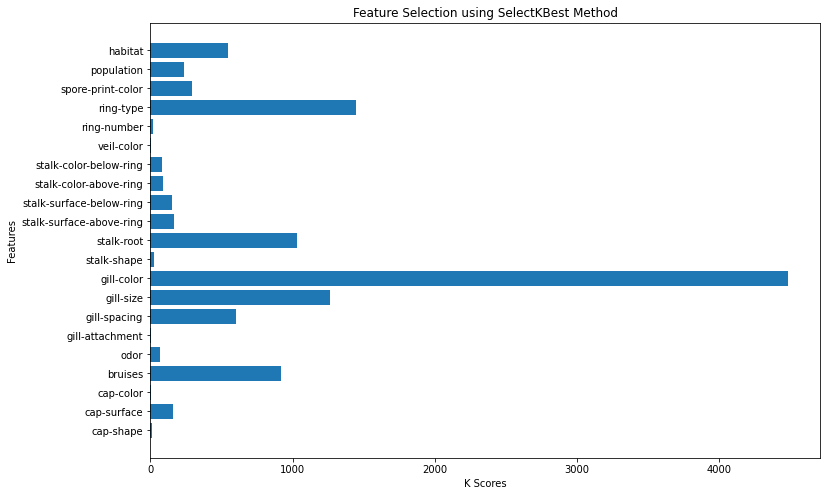

In [67]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(12, 8))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.ylabel('Features')
plt.xlabel('K Scores')
plt.yticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'])
plt.title('Feature Selection using SelectKBest Method')
plt.show()

In [68]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

After carefully analyzing above figure, we can now drop columns which are not necessary for our calculation.

In [69]:
X_train_new = X_train.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [70]:
# check dimensions of new train data
X_train_new.shape

(6093, 12)

In [71]:
# show first 5 records
X_train_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
3887,2,0,0,1,5,0,2,2,4,3,3,0
4119,0,0,0,0,3,0,1,1,2,1,4,1
1600,3,1,0,0,5,0,2,2,4,2,5,0
4988,3,0,0,0,7,0,1,1,2,1,5,4
6757,3,0,0,1,0,0,2,1,0,7,4,0


In [72]:
# drop unnecessary columns from test data also
X_test_new = X_test.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [73]:
# check dimensions of new test data
X_test_new.shape

(2031, 12)

In [74]:
# show first 5 records
X_test_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
1971,0,0,1,0,3,2,2,0,0,3,3,1
6654,2,0,0,1,0,0,2,2,0,7,4,2
5606,3,0,0,1,0,0,1,2,0,7,4,2
3332,3,1,0,0,5,0,2,2,4,3,5,0
6988,2,0,0,1,0,0,2,2,0,7,4,2


In [183]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [182]:
####Standard Scaler Pipeline

In [184]:
standard_scaler_pipeline = Pipeline(steps=[('standard_scaler', StandardScaler())])

In [185]:
X_standard_scaled = standard_scaler_pipeline.fit_transform(X)

In [186]:
report_standard_scaler = evaluate_models(X_standard_scaled, y, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.000

In [187]:
report_standard_scaler

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
2,Gradient Boosting,0
4,K-Neighbors Classifier,0
5,XGBClassifier,0
6,CatBoosting Classifier,0
7,AdaBoost Classifier,0
3,Logistic Regression,22340


#### Pipeline using Robust Scaler

In [188]:
robust_scaler_pipeline = Pipeline(steps=[('robust_scaler', RobustScaler())])

In [189]:
X_robust_scaled = robust_scaler_pipeline.fit_transform(X)

In [190]:
report_robust_scaler = evaluate_models(X_robust_scaled, y, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.000

In [191]:
report_robust_scaler

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
2,Gradient Boosting,0
4,K-Neighbors Classifier,0
5,XGBClassifier,0
6,CatBoosting Classifier,0
7,AdaBoost Classifier,0
3,Logistic Regression,22430


#### Pipeline using Minmax Scaler

In [192]:
minmax_scaler_pipeline = Pipeline(steps=[('minmax_scaler', MinMaxScaler())])

In [193]:
X_minmax_scaled = robust_scaler_pipeline.fit_transform(X)

In [195]:
report_minmax_scaler = evaluate_models(X_minmax_scaled, y, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.000

In [196]:
report_minmax_scaler

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
2,Gradient Boosting,0
4,K-Neighbors Classifier,0
5,XGBClassifier,0
6,CatBoosting Classifier,0
7,AdaBoost Classifier,0
3,Logistic Regression,22430


In [197]:
final_model = XGBClassifier()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled,y,test_size=0.2,random_state=42)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [201]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 1.0
Final XGBoost Classifier Accuracy Score (Test) : 1.0


In [202]:
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final XGBoost Classifier Cost Metric(Test) : 0


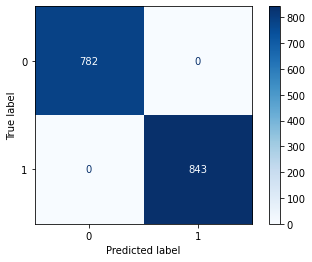

In [203]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

#### The best Model is XGBoost Classifier with 100% accuracy and cost of 0

As you can see from abobe that our model has 100% accuracy on both training data and test data

Now to create our webpage we need to extract values from feature columns so that we can create a drop down for users to select values of features.

#### Hyperparameter Tuning

In [244]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [245]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [246]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [247]:
classifier = XGBClassifier()

In [248]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [249]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_standard_scaled,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 3.53 seconds.


In [250]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [251]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

#### Control Overfitting
- When you observe high training accuracy, but low test accuracy, it is likely that you encountered overfitting   problem.

- There are in general two ways that you can control overfitting in XGBoost:

- The first way is to directly control model complexity.

- This includes max_depth, min_child_weight and gamma.

- The second way is to add randomness to make training robust to noise.

- This includes subsample and colsample_bytree.

- You can also reduce stepsize eta. Remember to increase num_round when you do so.

In [351]:
model = XGBClassifier(max_depth = 2 , min_child_weight = 3,colsample_bytree=0.1)

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled,y,test_size=0.2,random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [353]:
print("Final XGBoost Classifier Accuracy Score (Train) :", model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.998461301738729
Final XGBoost Classifier Accuracy Score (Test) : 0.9993846153846154


Now using above data we can input values in our drop down for 'habitat' column and for other features as well.

In [355]:
import pickle
pickle.dump(model, open("xgboost.pkl", "wb"))

#### Conclusion:

 - The target column has 2 class type one is 'poisonous' which has 3916 counts and second is 'edible' which has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.
 - There are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.
 - The mushroom may or may not have bruises but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.
 - The 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.
 - The mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.
 - The 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.
 - The 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.
 - The 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.
 - The XGBoost Classifier model has 99% accuracy on both training data and test data.